In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('/content/drive/My Drive/archive/train.csv')

In [3]:
df.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy


In [4]:
df.drop(['User_ID','Browser_Used','Device_Used'],axis=1,inplace=True)

In [5]:
df.head()

,Description,Is_Response
0,The room was kind of clean but had a VERY stro...,not happy
1,I stayed at the Crown Plaza April -- - April -...,not happy
2,I booked this hotel through Hotwire at the low...,not happy
3,Stayed here with husband and sons on the way t...,happy
4,My girlfriends and I stayed here to celebrate ...,not happy


In [6]:
df.isnull().sum()

Description    0
Is_Response    0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.isnull().sum()

Description    0
Is_Response    0
dtype: int64

In [9]:
df['Is_Response'].value_counts()

happy        26521
not happy    12411
Name: Is_Response, dtype: int64

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns


In [14]:
dict={'happy':0,'not happy':1}

In [15]:
df['class']=df['Is_Response'].map(dict)

In [16]:
df

,Description,Is_Response,class
0,The room was kind of clean but had a VERY stro...,not happy,1
1,I stayed at the Crown Plaza April -- - April -...,not happy,1
2,I booked this hotel through Hotwire at the low...,not happy,1
3,Stayed here with husband and sons on the way t...,happy,0
4,My girlfriends and I stayed here to celebrate ...,not happy,1
...,...,...,...
38927,We arrived late at night and walked in to a ch...,happy,0
38928,The only positive impression is location and p...,not happy,1
38929,Traveling with friends for shopping and a show...,not happy,1
38930,The experience was just ok. We paid extra for ...,not happy,1


In [17]:
df.drop(['Is_Response'],axis=1,inplace=True)

In [18]:
df

,Description,class
0,The room was kind of clean but had a VERY stro...,1
1,I stayed at the Crown Plaza April -- - April -...,1
2,I booked this hotel through Hotwire at the low...,1
3,Stayed here with husband and sons on the way t...,0
4,My girlfriends and I stayed here to celebrate ...,1
...,...,...
38927,We arrived late at night and walked in to a ch...,0
38928,The only positive impression is location and p...,1
38929,Traveling with friends for shopping and a show...,1
38930,The experience was just ok. We paid extra for ...,1


In [19]:
df.reset_index(inplace=True)

In [20]:
df

,index,Description,class
0,0,The room was kind of clean but had a VERY stro...,1
1,1,I stayed at the Crown Plaza April -- - April -...,1
2,2,I booked this hotel through Hotwire at the low...,1
3,3,Stayed here with husband and sons on the way t...,0
4,4,My girlfriends and I stayed here to celebrate ...,1
...,...,...,...
38927,38927,We arrived late at night and walked in to a ch...,0
38928,38928,The only positive impression is location and p...,1
38929,38929,Traveling with friends for shopping and a show...,1
38930,38930,The experience was just ok. We paid extra for ...,1


In [21]:
df.drop(['index'],axis=1,inplace=True)

In [22]:
df

,Description,class
0,The room was kind of clean but had a VERY stro...,1
1,I stayed at the Crown Plaza April -- - April -...,1
2,I booked this hotel through Hotwire at the low...,1
3,Stayed here with husband and sons on the way t...,0
4,My girlfriends and I stayed here to celebrate ...,1
...,...,...
38927,We arrived late at night and walked in to a ch...,0
38928,The only positive impression is location and p...,1
38929,Traveling with friends for shopping and a show...,1
38930,The experience was just ok. We paid extra for ...,1


In [33]:
final_df=df.copy()

In [34]:
final_df

,Description,class
0,The room was kind of clean but had a VERY stro...,1
1,I stayed at the Crown Plaza April -- - April -...,1
2,I booked this hotel through Hotwire at the low...,1
3,Stayed here with husband and sons on the way t...,0
4,My girlfriends and I stayed here to celebrate ...,1
...,...,...
38927,We arrived late at night and walked in to a ch...,0
38928,The only positive impression is location and p...,1
38929,Traveling with friends for shopping and a show...,1
38930,The experience was just ok. We paid extra for ...,1


In [35]:
import numpy as np
import pandas as pd
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, load_model
from keras.layers import Dense, Embedding, LSTM, Bidirectional,Flatten,Dropout
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import re

In [36]:
def remove_special_chars(text):

  for remove in map(lambda r: re.compile(re.escape(r)), [',', ':', "=", "&", ";", '%', '$','@', '%', '^', '*', '(', ')', '{', '}','[', ']', '|', '/', '\\', '>', '<', '-','!', '?', '.', '‘',' — ', ' — - ', '#',"' " ,"\""]):
    text.replace(remove, '', inplace=True)
  return text


In [37]:
def remove_tags(text):
 return re.compile( r" <[^>]+> ").sub(" ", text)
 

In [38]:
def remove_num(text):
 return ''.join(re.sub(r'([0–9+])',' ' ,text))

In [39]:
final_df.Description=final_df.Description.apply(lambda x : remove_tags(x))


In [40]:
final_df.Description=final_df.Description.apply(lambda x : remove_num(x))


In [41]:
final_df.Description

0        The room was kind of clean but had a VERY stro...
1        I stayed at the Crown Plaza April -- - April -...
2        I booked this hotel through Hotwire at the low...
3        Stayed here with husband and sons on the way t...
4        My girlfriends and I stayed here to celebrate ...
                               ...                        
38927    We arrived late at night and walked in to a ch...
38928    The only positive impression is location and p...
38929    Traveling with friends for shopping and a show...
38930    The experience was just ok. We paid extra for ...
38931    The Westin is a wonderfully restored grande da...
Name: Description, Length: 38932, dtype: object

In [42]:
remove_special_chars(final_df.Description)


0        The room was kind of clean but had a VERY stro...
1        I stayed at the Crown Plaza April   April   Th...
2        I booked this hotel through Hotwire at the low...
3        Stayed here with husband and sons on the way t...
4        My girlfriends and I stayed here to celebrate ...
                               ...                        
38927    We arrived late at night and walked in to a ch...
38928    The only positive impression is location and p...
38929    Traveling with friends for shopping and a show...
38930    The experience was just ok We paid extra for a...
38931    The Westin is a wonderfully restored grande da...
Name: Description, Length: 38932, dtype: object

In [43]:
tokenizer = Tokenizer(num_words=5000,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',lower=True,split=' ')

In [44]:
(tokenizer)

In [45]:
tokenizer.fit_on_texts(final_df["Description"])

In [46]:
X = tokenizer.texts_to_sequences(final_df["Description"])


In [47]:
X = pad_sequences(X,maxlen=100)


In [48]:
X[500]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,   26,  298,    2,
          6,   47,    7,    3,  425,   14,   21,    3,  566,   71, 1483,
          3,   22, 1022,   12,   21,  133, 2107, 2568,    4,    1,  179,
         63,    6,    5,    3,  501,    7,   28,   14,    2,    6,  749,
          1,   12,   33,    3,  528,    6,   56,  469,  371,    3,  109,
         88,   11,    3,   12,   21,  381,    3,  301, 1194, 1483,    3,
        109,  102,   32,    1,  123,  118,  651,   52,   94,  193,   70,
       1295,    7,    1, 1248,  496,    6,  289,    1,   12, 2533,  120,
         88], dtype=int32)

In [49]:
y= final_df['class']


In [50]:
y

0        1
1        1
2        1
3        0
4        1
        ..
38927    0
38928    1
38929    1
38930    1
38931    0
Name: class, Length: 38932, dtype: int64

In [51]:
vocab_size = len(tokenizer.word_index) + 1


In [52]:
vocab_size

70925

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state = 24)


In [55]:
import pickle
# saving
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [56]:
embedding_vector_features=40
model=Sequential()
model.add(Embedding(vocab_size,embedding_vector_features,input_length=100))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 40)           2837000   
_________________________________________________________________
lstm (LSTM)                  (None, 100)               56400     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 2,893,501
Trainable params: 2,893,501
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history=model.fit(X_train, Y_train,
 batch_size=32,
 epochs=20,
 validation_data=(X_test, Y_test),
 )

Epoch 1/20
852/852 [==============================] - 45s 53ms/step - loss: 0.4004 - accuracy: 0.8235 - val_loss: 0.3513 - val_accuracy: 0.8475
Epoch 2/20
852/852 [==============================] - 45s 53ms/step - loss: 0.2996 - accuracy: 0.8802 - val_loss: 0.3373 - val_accuracy: 0.8542
Epoch 3/20
852/852 [==============================] - 45s 52ms/step - loss: 0.2594 - accuracy: 0.8970 - val_loss: 0.3790 - val_accuracy: 0.8504
Epoch 4/20
852/852 [==============================] - 44s 52ms/step - loss: 0.2273 - accuracy: 0.9109 - val_loss: 0.3735 - val_accuracy: 0.8462
Epoch 5/20
852/852 [==============================] - 44s 52ms/step - loss: 0.2016 - accuracy: 0.9209 - val_loss: 0.3931 - val_accuracy: 0.8469
Epoch 6/20
852/852 [==============================] - 44s 51ms/step - loss: 0.1733 - accuracy: 0.9354 - val_loss: 0.4168 - val_accuracy: 0.8365
Epoch 7/20
852/852 [==============================] - 44s 51ms/step - loss: 0.1579 - accuracy: 0.9434 - val_loss: 0.4440 - val_accuracy:

In [ ]:
model.save('lstm_1.h5')

In [ ]:
string11=''' This hotel is awesome I love the service Anthony is really a great guy you see at the front desk! It is close to everything and is wonderful for kids I love it. The best hotel ever but wonderful cleanliness and quality great hotel for couples and singles.'''
x_1=tokenizer.texts_to_sequences([string11])
x_1 = pad_sequences(x_1,maxlen=100)
model.predict(x_1)

array([[0.00015311]], dtype=float32)

In [57]:
embedding_vector_features=40
model_2=Sequential()
model_2.add(Embedding(vocab_size,embedding_vector_features,input_length=100))
model_2.add(Dropout(0.5))
model_2.add(LSTM(100))
model_2.add(Dropout(0.5))
model_2.add(Dense(1,activation='sigmoid'))
model_2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model_2.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 40)           2837000   
_________________________________________________________________
dropout (Dropout)            (None, 100, 40)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               56400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 2,893,501
Trainable params: 2,893,501
Non-trainable params: 0
_________________________________________________________________
None


In [58]:
history_1=model_2.fit(X_train, Y_train,
 batch_size=32,
 epochs=20,
 validation_data=(X_test, Y_test),
 )

Epoch 1/20
852/852 [==============================] - 30s 35ms/step - loss: 0.4156 - accuracy: 0.8161 - val_loss: 0.3465 - val_accuracy: 0.8538
Epoch 2/20
852/852 [==============================] - 30s 35ms/step - loss: 0.3205 - accuracy: 0.8712 - val_loss: 0.3408 - val_accuracy: 0.8535
Epoch 3/20
852/852 [==============================] - 30s 35ms/step - loss: 0.2918 - accuracy: 0.8831 - val_loss: 0.3351 - val_accuracy: 0.8576
Epoch 4/20
852/852 [==============================] - 29s 34ms/step - loss: 0.2723 - accuracy: 0.8926 - val_loss: 0.3432 - val_accuracy: 0.8548
Epoch 5/20
852/852 [==============================] - 29s 34ms/step - loss: 0.2586 - accuracy: 0.8971 - val_loss: 0.3693 - val_accuracy: 0.8535
Epoch 6/20
852/852 [==============================] - 29s 34ms/step - loss: 0.2436 - accuracy: 0.9052 - val_loss: 0.3792 - val_accuracy: 0.8533
Epoch 7/20
852/852 [==============================] - 29s 34ms/step - loss: 0.2302 - accuracy: 0.9109 - val_loss: 0.3699 - val_accuracy:

In [59]:
model_2.save('lstm_2.h5')

In [60]:
import matplotlib.pyplot as plt


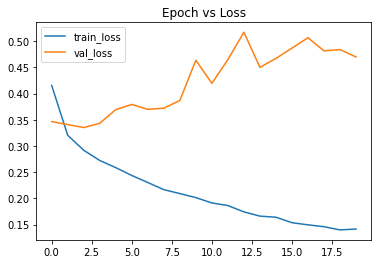

In [61]:
plt.plot(history_1.history['loss'],label='train_loss')
plt.plot(history_1.history['val_loss'],label='val_loss')
plt.legend()
plt.title('Epoch vs Loss')
plt.show()

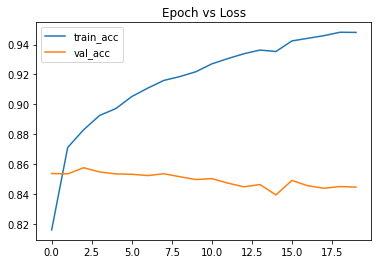

In [62]:
plt.plot(history_1.history['accuracy'],label='train_acc')
plt.plot(history_1.history['val_accuracy'],label='val_acc')
plt.legend()
plt.title('Epoch vs Loss')
plt.show()

In [64]:
embedding_vector_features=40
model_3=Sequential()
model_3.add(Embedding(vocab_size,embedding_vector_features,input_length=100))
model_3.add(Dropout(0.65))
model_3.add(Bidirectional(LSTM(100)))
model_3.add(Dropout(0.65))
model_3.add(Dense(1,activation='sigmoid'))
model_3.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model_3.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 40)           2837000   
_________________________________________________________________
dropout_4 (Dropout)          (None, 100, 40)           0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 200)               112800    
_________________________________________________________________
dropout_5 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 201       
Total params: 2,950,001
Trainable params: 2,950,001
Non-trainable params: 0
_________________________________________________________________
None


In [65]:
history_2=model_3.fit(X_train, Y_train,
 batch_size=32,
 epochs=20,
 validation_data=(X_test, Y_test),
 )

Epoch 1/20
852/852 [==============================] - 37s 43ms/step - loss: 0.4245 - accuracy: 0.8124 - val_loss: 0.3488 - val_accuracy: 0.8491
Epoch 2/20
852/852 [==============================] - 36s 42ms/step - loss: 0.3297 - accuracy: 0.8660 - val_loss: 0.3734 - val_accuracy: 0.8540
Epoch 3/20
852/852 [==============================] - 36s 42ms/step - loss: 0.3055 - accuracy: 0.8780 - val_loss: 0.3610 - val_accuracy: 0.8407
Epoch 4/20
852/852 [==============================] - 36s 42ms/step - loss: 0.2935 - accuracy: 0.8847 - val_loss: 0.3393 - val_accuracy: 0.8580
Epoch 5/20
852/852 [==============================] - 35s 42ms/step - loss: 0.2776 - accuracy: 0.8896 - val_loss: 0.3712 - val_accuracy: 0.8560
Epoch 6/20
852/852 [==============================] - 36s 42ms/step - loss: 0.2651 - accuracy: 0.8959 - val_loss: 0.3526 - val_accuracy: 0.8548
Epoch 7/20
852/852 [==============================] - 36s 42ms/step - loss: 0.2560 - accuracy: 0.8998 - val_loss: 0.3532 - val_accuracy:

In [66]:
model_3.save('b_lstm.h5')

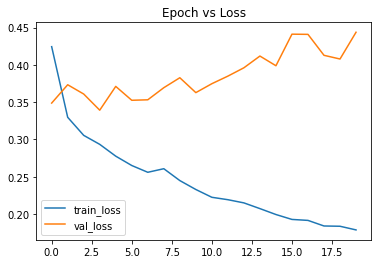

In [67]:
plt.plot(history_2.history['loss'],label='train_loss')
plt.plot(history_2.history['val_loss'],label='val_loss')
plt.legend()
plt.title('Epoch vs Loss')
plt.show()

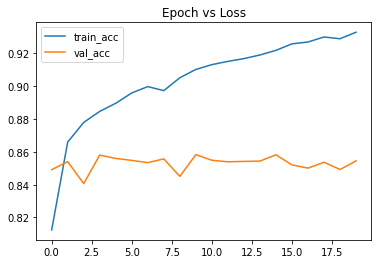

In [68]:
plt.plot(history_2.history['accuracy'],label='train_acc')
plt.plot(history_2.history['val_accuracy'],label='val_acc')
plt.legend()
plt.title('Epoch vs Loss')
plt.show()

In [69]:
string11=''' Looking for a motel in close proximity to TV taping of a Dr. Phil show, we chose the Dunes on Sunset Blvd in West Hollywood. Although the property displayed the AAA emblem, it certainly left a lot to be desired. There were chips & scrapes on the bottom of the door frame in the bathroom and the lotion containers were half full--apparently not replaced by housekeeping. We needed an early wakeup call, but couldn't use the clock radio alarm as there wasn't a radio in the room. There was no TV channel listing on the remote, or on the TV menu making viewing a chore.The TV remote had to be returned when checking-out. This place served its purpose, but not a place to revisit.'''
x_1=tokenizer.texts_to_sequences([string11])
x_1 = pad_sequences(x_1,maxlen=100)
model_3.predict(x_1)

array([[0.98076105]], dtype=float32)